# ÏπòÌÉÄ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù 

* Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ
    * <span style="color:blue"> ÏàòÏ†ï rÏ†úÍ≥± :57.9% </span>
    * <span style="color:blue"> ÎèÖÎ¶ΩÎ≥ÄÏàò :C(gotobed_late)+sleep_score </span>
    * <span style="color:blue"> Ìï¥ÏÑù : ÏπòÌÉÄÍ∞Ä Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º ÎÜíÍ≤å ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïû†Ïù¥ Ï†úÏùº Ï§ëÏöîÌïòÎã§. Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†Ñ(2Ïãú Ìè¨Ìï®X)Ïóê ÏûêÏïºÌïòÍ≥†, ÎàÑÍ∞Ä ÏóÖÏñ¥Í∞ÄÎèÑ Î™®Î•º Ï†ïÎèÑÎ°ú Ìëπ Ïûò ÏûêÏïºÌïúÎã§. Îã§Î•∏ Î≥ÄÏàòÎäî ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÎã§. </span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # Ìè∞Ìä∏
#ÌïúÍ∏ÄÌè∞Ìä∏ Ï†ÅÏö©-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ÌååÏùºÏù¥ ÏûàÎäî Í≤ΩÎ°ú ÏßÄÏ†ï
path = 'C:\\Users\\USER\\ÌÜµÍ≥Ñ\\mini\\'

# Îç∞Ïù¥ÌÑ∞ import

In [3]:
df_all = pd.read_excel(path +"today_score_data.xlsx")

# ÏπòÌÉÄ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú

In [4]:
df = df_all[df_all["name"]=="cheetah"]

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [5]:
df.head()

cnt     name  today_score       date  dayofweek  dayofweek_check  \
96    97  cheetah            7 2022-09-28          4                0   
97    98  cheetah            5 2022-09-29          5                0   
98    99  cheetah            6 2022-09-30          6                0   
99   100  cheetah            5 2022-10-01          7                1   
100  101  cheetah            7 2022-10-02          1                1   

     avg_temp  low_temp  high_temp  precipitation  ...  \
96       20.4      16.1       26.1            0.0  ...   
97       20.4      16.4       26.5            0.0  ...   
98       20.7      14.8       27.7            0.0  ...   
99       20.9      14.4       27.6            0.0  ...   
100      19.4      17.2       21.6           15.8  ...   

     yesterday_exercise_time  yesterday_step_cnt yesterday_drinking period  \
96                         0                4349                  0      0   
97                        60                3387                  0      0   
98                         0                1636                  0      0   
99                         0                7149                  0      0   
100                        0                4085                  0      0   

     caffeine  yesterday_satisfaction  gotobed_range  getup_range  \
96          1                       4           01ÏãúÎåÄ         07ÏãúÎåÄ   
97          1                       2           00ÏãúÎåÄ         06ÏãúÎåÄ   
98          0                       4           01ÏãúÎåÄ         07ÏãúÎåÄ   
99          0                       4           00ÏãúÎåÄ         08ÏãúÎåÄ   
100         0                       2           01ÏãúÎåÄ         09ÏãúÎåÄ   

     gotobed_late  getup_early  
96              0            1  
97              0            1  
98              0            1  
99              0            0  
100             0            0  

[5 rows x 29 columns]

In [6]:
df.describe()

cnt  today_score  dayofweek  dayofweek_check   avg_temp   low_temp  \
count   48.00    48.000000  48.000000        48.000000  48.000000  48.000000   
mean   120.50     5.791667   4.020833         0.291667  13.929167   9.595833   
std     14.00     1.821366   2.036785         0.459340   3.762636   3.929591   
min     97.00     2.000000   1.000000         0.000000   4.900000   0.800000   
25%    108.75     4.750000   2.000000         0.000000  11.175000   6.650000   
50%    120.50     6.000000   4.000000         0.000000  13.550000   9.550000   
75%    132.25     7.000000   6.000000         1.000000  16.300000  11.800000   
max    144.00     9.000000   7.000000         1.000000  21.400000  17.500000   

       high_temp  precipitation  precipitation_check  class_check  ...  \
count  48.000000      48.000000            48.000000    48.000000  ...   
mean   19.250000       3.792500             0.208333     0.729167  ...   
std     4.017197      14.023592             0.410414     0.449093  ...   
min     9.800000       0.000000             0.000000     0.000000  ...   
25%    16.550000       0.000000             0.000000     0.000000  ...   
50%    19.100000       0.000000             0.000000     1.000000  ...   
75%    21.600000       0.000000             0.000000     1.000000  ...   
max    27.700000      76.000000             1.000000     1.000000  ...   

       sleep_score  yesterday_exercise  yesterday_exercise_time  \
count    48.000000           48.000000                48.000000   
mean      2.812500            0.208333                12.500000   
std       1.160635            0.410414                24.624845   
min       1.000000            0.000000                 0.000000   
25%       2.000000            0.000000                 0.000000   
50%       3.000000            0.000000                 0.000000   
75%       4.000000            0.000000                 0.000000   
max       5.000000            1.000000                60.000000   

       yesterday_step_cnt  yesterday_drinking     period   caffeine  \
count           48.000000           48.000000  48.000000  48.000000   
mean          5353.625000            0.208333   0.125000   0.270833   
std           3196.325454            0.410414   0.334219   0.449093   
min            273.000000            0.000000   0.000000   0.000000   
25%           3062.000000            0.000000   0.000000   0.000000   
50%           4900.000000            0.000000   0.000000   0.000000   
75%           6993.000000            0.000000   0.000000   1.000000   
max          15030.000000            1.000000   1.000000   1.000000   

       yesterday_satisfaction  gotobed_late  getup_early  
count               48.000000     48.000000    48.000000  
mean                 2.979167      0.208333     0.791667  
std                  0.887012      0.410414     0.410414  
min                  1.000000      0.000000     0.000000  
25%                  2.000000      0.000000     1.000000  
50%                  3.000000      0.000000     1.000000  
75%                  4.000000      0.000000     1.000000  
max                  5.000000      1.000000     1.000000  

[8 rows x 23 columns]

In [7]:
# null Í∞í ÌôïÏù∏
df.isnull().sum()

cnt                        0
name                       0
today_score                0
date                       0
dayofweek                  0
dayofweek_check            0
avg_temp                   0
low_temp                   0
high_temp                  0
precipitation              0
precipitation_check        0
class_check                0
gotobed_time               0
getup_time                 0
sleep_time                 0
morning_routine            0
weather_prefer             0
sleep_score                0
yesterday_exercise         0
yesterday_exercise_time    0
yesterday_step_cnt         0
yesterday_drinking         0
period                     0
caffeine                   0
yesterday_satisfaction     0
gotobed_range              0
getup_range                0
gotobed_late               0
getup_early                0
dtype: int64

# Ïª¨Îüº Ï†ïÎ≥¥

## Ï¢ÖÏÜçÎ≥ÄÏàò

* today_score : Ïò§Îäò ÎÇòÏùò Ï†êÏàò (10Ï†ê ÎßåÏ†ê)

## ÎèÖÎ¶ΩÎ≥ÄÏàò
*  ÏÉâÍπî ÏùòÎØ∏ 
    * Î≤îÏ£ºÌòï Î≥ÄÏàò : <span style="color:red"> Îπ®Í∞ÑÏÉâ</span>
    *  ÏàòÏπòÌòï Î≥ÄÏàò : Í≤ÄÏ†ïÏÉâ

* date                       : ÎÇ†Ïßú (2022-09-28 ~ 2022-11-14)
*  <span style="color:red"> dayofweek                  : ÏöîÏùº (ÏùºÏöîÏùº = 1 ~ ÌÜ†ÏöîÏùº = 7) </span>
* <span style="color:red"> dayofweek_check : Ï£ºÎßê Ïó¨Î∂Ä (Ï£ºÎßê = 1, Ï£ºÎßê x = 0)</span>

* <span style="color:red"> class_check                      : ÏàòÏóÖ Ïó¨Î∂Ä (ÏàòÏóÖ Ïïà ÌïòÎäî ÎÇ† = 0, ÏàòÏóÖ ÌïòÎäî ÎÇ† = 1) </span>
* gotobed_time               : Ï∑®Ïπ® ÏãúÍ∞Ñ 
* <span style="color:red"> gotobed_range              : Ï∑®Ïπ® ÏãúÍ∞ÑÎåÄ  </span>
* <span style="color:red"> gotobed_late              : Îä¶Í≤å Ï∑®Ïπ®ÌñàÎäîÏßÄ Ïó¨Î∂Ä (Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†ÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®X)=0, Ïò§Ï†Ñ 2Ïãú Ïù¥ÌõÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®o)=1)  </span>
* getup_time                 : Í∏∞ÏÉÅ ÏãúÍ∞Ñ 
* <span style="color:red"> getup_range              : Í∏∞ÏÉÅ ÏãúÍ∞ÑÎåÄ  </span>
* <span style="color:red"> getup_early              : ÏùºÏ∞ç Í∏∞ÏÉÅ ÌñàÎäîÏßÄ Ïó¨Î∂Ä (Ïò§Ï†Ñ 8Ïãú Ïù¥ÌõÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®O)=0, Ïò§Ï†Ñ 8Ïãú Ïù¥Ï†ÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®X)=1  </span>
* sleep_time                 : ÏàòÎ©¥ ÏãúÍ∞Ñ (Í∏∞ÏÉÅÏãúÍ∞Ñ - Ï∑®Ïπ® ÏãúÍ∞Ñ)
* <span style="color:red"> morning_routine            : Î™®ÎãùÎ£®Ìã¥ Ïã§Ìñâ Ïó¨Î∂Ä (Î™®ÎãùÎ£®Ìã¥ x = 0, Î™®ÎãùÎ£®Ìã¥ o = 1) </span>
* <span style="color:red"> weather_prefer             : ÎÇ†Ïî® ÏÑ†Ìò∏ Ïó¨Î∂Ä (ÎÇ†Ïî® ÏÑ†Ìò∏ x = 0, ÎÇ†Ïî® ÏÑ†Ìò∏ o = 1) </span>
* sleep_score                : ÏàòÎ©¥ Ï†êÏàò (5Ï†ê ÎßåÏ†ê)
* <span style="color:red"> yesterday_exercise         : Ï†ÑÏùº Ïö¥Îèô Ïó¨Î∂Ä (Ï†ÑÏùº Ïö¥Îèô x = 0, Ï†ÑÏùº Ïö¥Îèô o = 1) </span>
* yesterday_exercise_time    : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞Ñ (Î∂Ñ)
* yesterday_step_cnt         : Ï†ÑÎÇ† Í±∏Ïùå Ïàò 
* <span style="color:red"> yesterday_drinking         : Ï†ÑÎÇ† ÏùåÏ£º Ïó¨Î∂Ä (Ï†ÑÎÇ† ÏùåÏ£º x = 0, Ï†ÑÏùº Ïö¥Ï£º o = 1) </span>
* <span style="color:red"> period                     : ÏÉùÎ¶¨ Ïó¨Î∂Ä (ÏÉùÎ¶¨ x = 0, ÏÉùÎ¶¨ o = 1) </span>
* <span style="color:red"> caffeine                   : Ïπ¥ÌéòÏù∏ ÏÑ≠Ï∑® Ïó¨Î∂Ä (Ïπ¥ÌéòÏù∏ x = 0, Ïπ¥ÌéòÏù∏ o = 1) </span>
* yesterday_satisfaction     : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ (5Ï†ê ÎßåÏ†ê)

* avg_temp                   : ÌèâÍ∑† Í∏∞Ïò® (‚ÑÉ)
* low_temp                   : ÏµúÏ†Ä Í∏∞Ïò® (‚ÑÉ)
* high_temp                  : ÏµúÍ≥† Í∏∞Ïò® (‚ÑÉ)
* precipitation              : Í∞ïÏàòÎüâ (mm)
* <span style="color:red">  precipitation_check : Í∞ïÏàò Ïó¨Î∂Ä (Í∞ïÏàò = 1, Í∞ïÏàò x = 0)</span>

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω 
* ÏàòÏπòÌòï Î≥ÄÏàò -> int or float
* Î≤îÏ£ºÌòï Î≥ÄÏàò -> object

In [8]:
#Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 96 to 143
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     int64         
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-null

In [9]:
#Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º object ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

In [10]:
#Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 96 to 143
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     object        
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     object        
 11  class_check              48 non-null     object        
 12  gotobed_time             48 non-null

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

## Ï¢ÖÏÜçÎ≥ÄÏàò today_score 

<AxesSubplot:xlabel='today_score', ylabel='Density'>

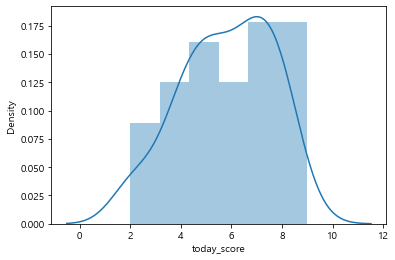

In [11]:
sns.distplot(df['today_score'])

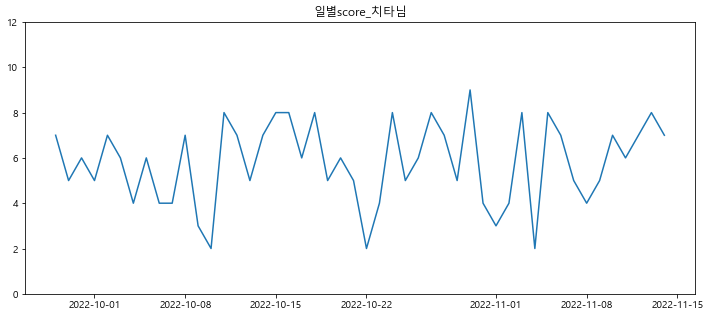

In [12]:
plt.figure(figsize=(12,5))
plt.title('ÏùºÎ≥Ñscore_ÏπòÌÉÄÎãò')
plt.ylim([0, 12])
plt.plot(df['date'],df['today_score'])

### ÎèÖÎ¶Ω Î≥ÄÏàò_Î≤îÏ£ºÌòï Î≥ÄÏàò

In [13]:
# Î≥ÄÏàò ÌòïÏù¥ obhectÏù∏ Ïª¨Îüº Ï∂îÏ∂ú
object_feature = [ col for col in df.columns if df[col].dtypes == "object"]
object_feature

['name',
 'dayofweek',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'gotobed_time',
 'getup_time',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

In [14]:
# name, gotbed_time, getup_time Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
category_feature = list(set(object_feature) - set(['name','gotobed_time','getup_time']))
category_feature

['getup_range',
 'dayofweek',
 'morning_routine',
 'getup_early',
 'yesterday_exercise',
 'precipitation_check',
 'class_check',
 'period',
 'dayofweek_check',
 'gotobed_range',
 'yesterday_drinking',
 'gotobed_late',
 'caffeine',
 'weather_prefer']

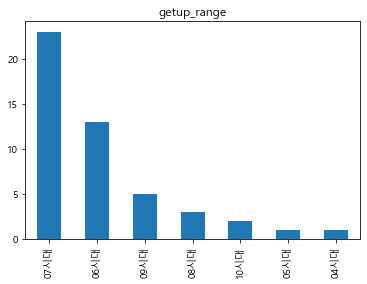

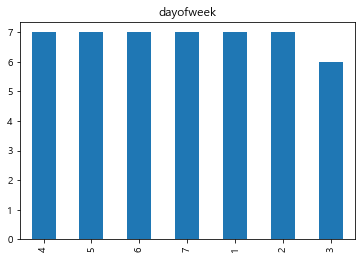

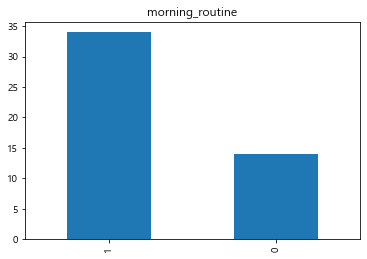

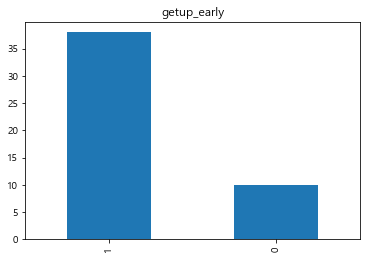

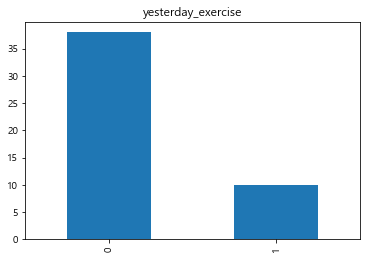

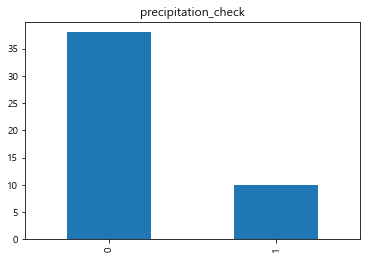

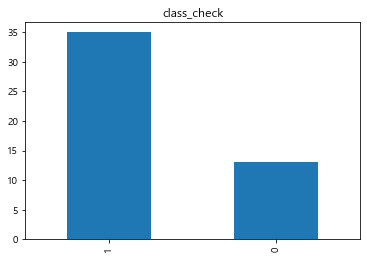

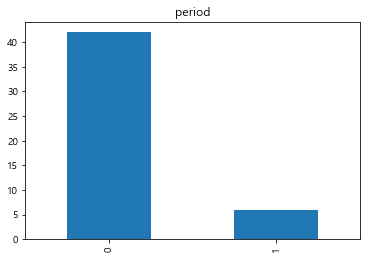

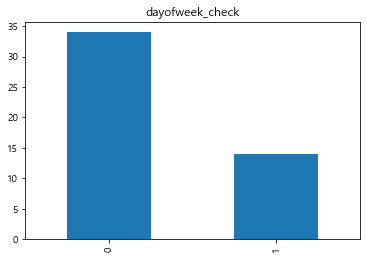

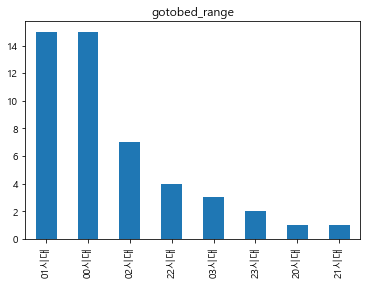

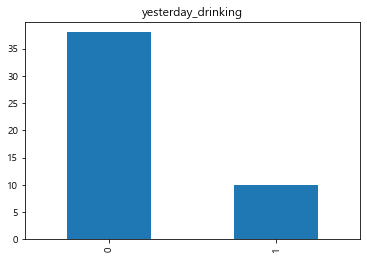

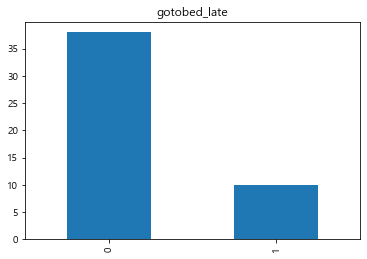

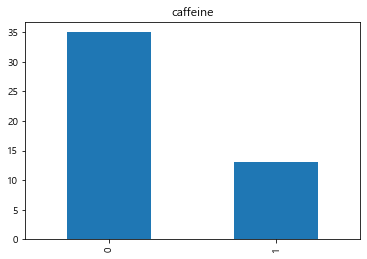

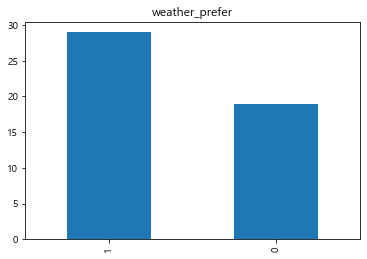

In [15]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

* Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ Ìï¥ÏÑù 
: <span style="color:blue">ÌååÎûÄÏÉâ</span> Í∏ÄÏî®Îäî 5Î™Ö Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îã§Î•∏ Í≤∞Í≥º 
    * weather_prefer : Ïò§Îäò ÎÇ†Ïî®Í∞Ä ÎßòÏóê Îì† ÎÇ†Ïù¥ ÎßòÏóê Îì§ÏßÄ ÏïäÏùÄ ÎÇ† Î≥¥Îã§ ÎßéÎã§. 
    * <span style="color:blue"> morning_routine : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ìïú ÎÇ†Ïù¥ Ïïà Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§.</span>
    * yesterday_drinking : Ïñ¥Ï†ú Ïà†ÏùÑ Ïïà ÎßàÏã† ÎÇ†Ïù¥ ÎßàÏã† ÎÇ†Î≥¥Îã§ ÎßéÎã§.
    * period
    * gotobed_range : Ï∑®Ïπ®ÏãúÍ∞ÑÏùÄ 01Ïãú -> 00Ïãú -> 02Ïãú ÏàúÏúºÎ°ú ÎßéÎã§.
    * class_check : ÏàòÏóÖÏùÑ Ìïú ÎÇ†Ïù¥ Ïïà Ìïú ÎÇ†Î≥¥Îã§ ÎßéÎã§. 
    * caffeine : Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑®ÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïù¥ ÏÑ≠Ï∑®Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§. 
    * dayofweek_check 
    * <span style="color:blue"> getup_early : Ïò§Ï†Ñ 8Ïãú Ïù¥Ï†Ñ(8Ïãú Ìè¨Ìï®x)Ïóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§. </span>
    * gotobed_late : Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†Ñ(2Ïãú Ìè¨Ìï®x)Ïóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§.     
    * yesterday_exercise : Ïñ¥Ï†ú Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ ÎßéÎã§. 
    * precipitation_check : ÎπÑÍ∞Ä Ïïà Ïò® ÎÇ†Ïù¥ ÎπÑ Ïò® ÎÇ† Î≥¥Îã§ ÎßéÎã§.    
    * dayofweek 
    * <span style="color:blue"> getup_range : Í∏∞ÏÉÅ ÏãúÍ∞ÑÏùÄ 07Ïãú -> 06Ïãú -> 09Ïãú ÏàúÏúºÎ°ú ÎßéÎã§. </span>

### ÎèÖÎ¶Ω Î≥ÄÏàò_ÏàòÏπòÌòï Î≥ÄÏàò 

In [16]:
# Ï†ÑÏ≤¥ Î≥ÄÏàòÏ§ë objectÎ≥ÄÏàò Ï†úÏô∏, today_score,cnt, dateÎèÑ Ï†úÏô∏
numerical_feature = list(set(df.columns) - set(object_feature) - set(['cnt','date','today_score']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

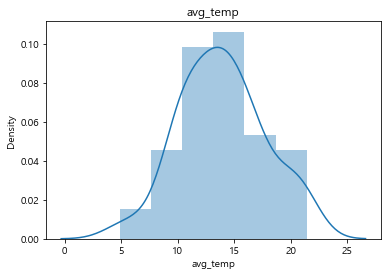

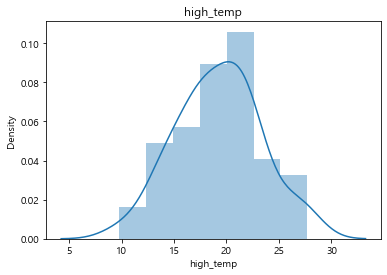

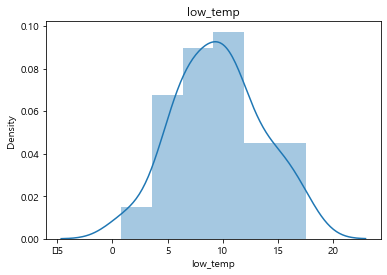

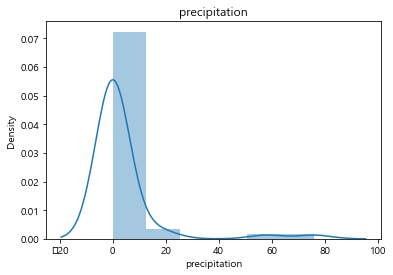

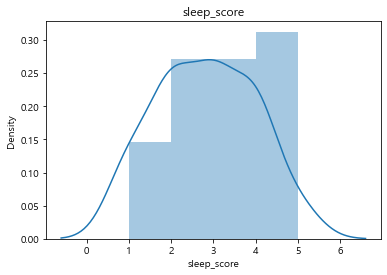

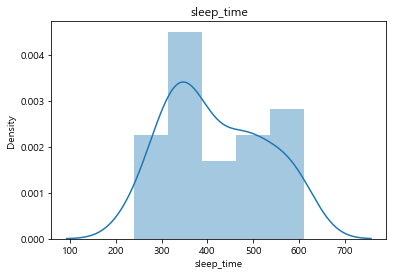

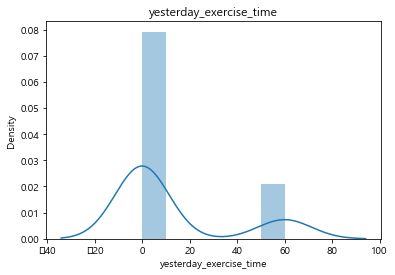

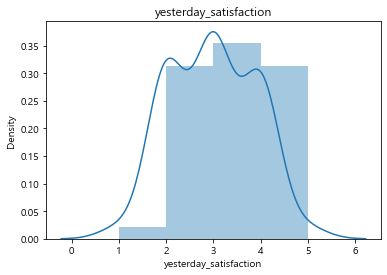

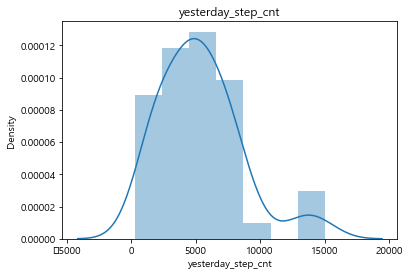

In [17]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
for col in numerical_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

# ÏÉÅÍ¥ÄÎ∂ÑÏÑù 

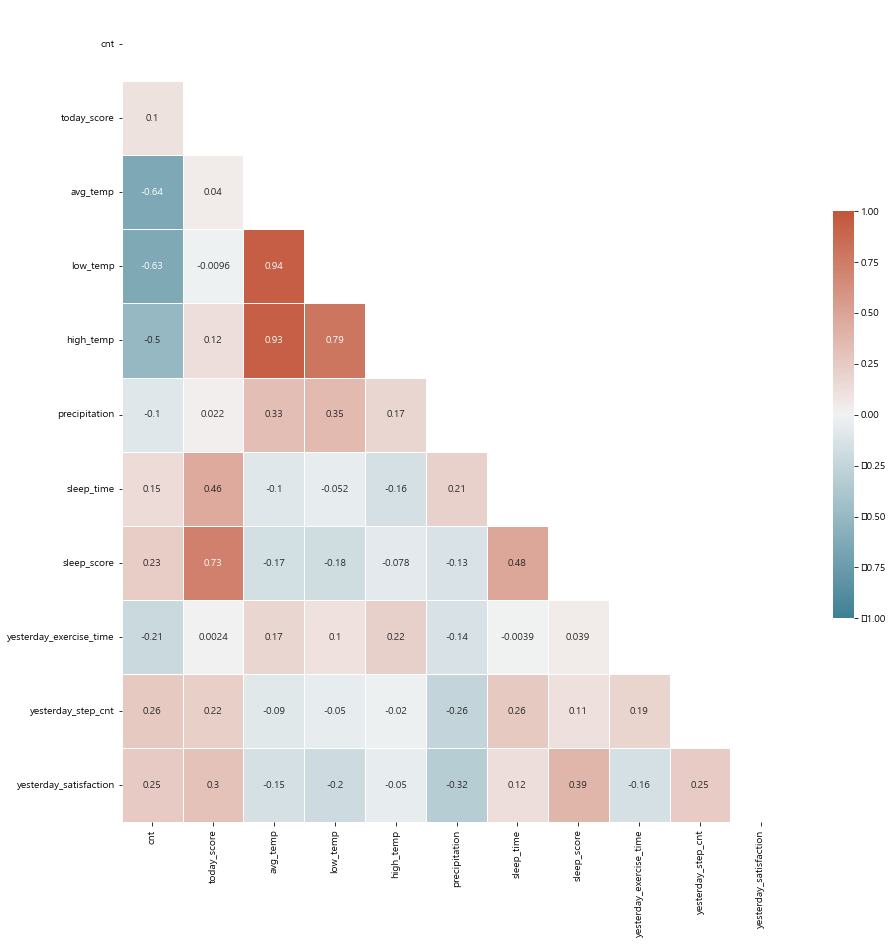

In [18]:
tmp = df.corr()
# Í∑∏Î¶º ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
fig, ax = plt.subplots( figsize=(15,15) )

# ÏÇºÍ∞ÅÌòï ÎßàÏä§ÌÅ¨Î•º ÎßåÎì†Îã§(ÏúÑ Ï™Ω ÏÇºÍ∞ÅÌòïÏóê True, ÏïÑÎûò ÏÇºÍ∞ÅÌòïÏóê False)
mask = np.zeros_like(tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# ÌûàÌä∏Îßµ ÌåîÎ†àÌä∏ ÏÉâÏÉÅ Î∂àÎü¨Ïò§Í∏∞
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# ÌûàÌä∏ÎßµÏùÑ Í∑∏Î¶∞Îã§
sns.heatmap(tmp , 
            annot = True,   # Ïã§Ï†ú Í∞íÏùÑ ÌëúÏãúÌïúÎã§
            mask=mask,      # ÌëúÏãúÌïòÏßÄ ÏïäÏùÑ ÎßàÏä§ÌÅ¨ Î∂ÄÎ∂ÑÏùÑ ÏßÄÏ†ïÌïúÎã§
            linewidths=.5,  # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            cbar_kws={"shrink": .5},# Ïª¨Îü¨Î∞î ÌÅ¨Í∏∞ Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏù¥Í∏∞
            cmap = cmap,
            vmin = -1,vmax = 1   # Ïª¨Îü¨Î∞î Î≤îÏúÑ -1 ~ 1
           )  
plt.show()


* ÏÉÅÍ¥Ä Î∂ÑÏÑù Ìï¥ÏÑù 
: <span style="color:blue">ÌååÎûÄÏÉâ</span> Í∏ÄÏî®Îäî 5Î™Ö Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îã§Î•∏ Í≤∞Í≥º 
    * Ïò§Îäò ÎÇòÏùò Ï†êÏàò(today_score)ÏôÄÎäî sleep_time(ÏàòÎ©¥ÏãúÍ∞Ñ), sleep_score(ÏàòÎ©¥ Ï†êÏàò), yesterday_satisfaction(Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ)Í∞Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * ÌèâÍ∑†Í∏∞Ïò®(avg_temp)Í≥º ÏµúÍ≥†Í∏∞Ïò®(high_temp), ÏµúÏ†ÄÍ∏∞Ïò®(low_temp)ÏùÄ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÎèÑ ÎÜíÍ≤å ÎÇòÏò¨ Í≤É Í∞ôÏïÑÏÑú, Îã§Ï§ëÌöåÍ∑ÄÏóê ÎÑ£ÏùÑ Îïå Ï≤¥ÌÅ¨Ìï¥Î¥êÏïºÍ≤†Îã§.
    * sleep_score(ÏàòÎ©¥ Ï†êÏàò)ÏôÄ yesterday_satisfaction(Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ)Í∞Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * sleep_score(ÏàòÎ©¥ Ï†êÏàò)ÏôÄ sleep_time(ÏàòÎ©¥ÏãúÍ∞Ñ)Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
    * <span style="color:blue"> yesterday_step_cnt(Ï†ÑÎÇ† Í±∏ÏùåÏàò)ÏôÄ yesterday_exercise_time(Ï†ÑÎÇ† Ïö¥ÎèôÏãúÍ∞Ñ)Ïù¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í±∞Ïùò ÏóÜÎã§.</span>

# ÏôúÎèÑ ÌôïÏù∏
- ÏôúÎèÑÍ∞Ä -2~2ÏÇ¨Ïù¥Ïóê ÏûàÏúºÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÏ°±ÌïúÎã§Í≥† Î≥∏Îã§. 
- Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÏ°±ÌïòÏßÄ ÏïäÎäî Í∞íÏùÄ logÎ•º ÏîåÏö∞Îäî Í≤ÉÏùÑ Í≥†Î†§Ìï¥Î≥¥Ïûê.

In [19]:
df.skew()

cnt                        0.000000
today_score               -0.382578
dayofweek                 -0.029393
dayofweek_check            0.946538
avg_temp                   0.096425
low_temp                   0.066712
high_temp                  0.016375
precipitation              4.342097
precipitation_check        1.483126
class_check               -1.064949
sleep_time                 0.284590
morning_routine           -0.946538
weather_prefer            -0.439882
sleep_score                0.041603
yesterday_exercise         1.483126
yesterday_exercise_time    1.483126
yesterday_step_cnt         1.042527
yesterday_drinking         1.483126
period                     2.341607
caffeine                   1.064949
yesterday_satisfaction     0.041726
gotobed_late               1.483126
getup_early               -1.483126
dtype: float64

* Í≤∞Í≥º : Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ï†úÏô∏ÌïòÍ≥† precipitation

# Îã®Ïùº ÏÑ†Ìòï ÌöåÍ∑Ä

## Î≤îÏ£ºÌòï Î≥ÄÏàò

In [20]:
#Î≤îÏ£ºÌòï Î≥ÄÏàò Ï∂úÎ†•
category_feature

['getup_range',
 'dayofweek',
 'morning_routine',
 'getup_early',
 'yesterday_exercise',
 'precipitation_check',
 'class_check',
 'period',
 'dayofweek_check',
 'gotobed_range',
 'yesterday_drinking',
 'gotobed_late',
 'caffeine',
 'weather_prefer']

* üéâÏùòÎØ∏ : p-valueÍ∞Ä 0.05ÎØ∏ÎßåÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
* <span style="color:blue">ÌååÎûÄÏÉâ</span> Í∏ÄÏî® ÏùòÎØ∏ :  5Î™Ö Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îã§Î•∏ Í≤∞Í≥º

###  dayofweek : ÏöîÏùº (ÏùºÏöîÏùº = 1 ~ ÌÜ†ÏöîÏùº = 7)
* <span style="color:blue"> Ìï¥ÏÑù : ÏöîÏùºÎ≥ÑÎ°ú Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù </span>
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Îç∞Î™®Îç∞Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ Í∏∞Í∞ÑÏóêÎäî ÏöîÏùºÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌñàÍ∏∞Ïóê ÏöîÏùºÎ≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎêú Í≤É Í∞ôÎã§.

In [21]:
test = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.4404
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.847
Time:                        23:42:10   Log-Likelihood:                -94.885
No. Observations:                  48   AIC:                             203.8
Df Residuals:                      41   BIC:                             216.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5714      0.71

### dayofweek_check : Ï£ºÎßê Ïó¨Î∂Ä (Ï£ºÎßê = 1 , Ï£ºÎßê x = 0)
* <span style="color:blue"> Ìï¥ÏÑù : Ï£ºÎßêÍ≥º ÌèâÏùºÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù </span>
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Îç∞Î™®Îç∞Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ Í∏∞Í∞ÑÏóêÎäî ÏöîÏùºÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌñàÍ∏∞Ïóê ÏöîÏùºÎ≥ÑÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎêú Í≤É Í∞ôÎã§.

In [22]:
test = ols('today_score ~ C(dayofweek_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.469
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.232
Time:                        23:44:17   Log-Likelihood:                -95.630
No. Observations:                  48   AIC:                             195.3
Df Residuals:                      46   BIC:                             199.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

###  precipitation_check : Í∞ïÏàò Ïó¨Î∂Ä (Í∞ïÏàò = 1 , Í∞ïÏàò x = 0)
* Í∞ÄÏÑ§ : ÎπÑ Ïïà Ïò§Îäî ÎÇ†Ïù¥ ÎπÑÏò§Îäî ÎÇ†Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§.
<br> <br/>
* Ìï¥ÏÑù : ÎπÑÏò§Îäî ÎÇ†Í≥º ÎπÑ ÏïàÏò§Îäî ÎÇ†Ïù¥ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : ÎπÑ Ïò§Îäî ÎÇ†Ïù¥ Î™áÏùº ÏóÜÏóàÍ≥†, Ïò® ÎÇ† ÎèÑ Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º Îß§Í∏∞Îäî ÏïÑÏπ®Ïóê ÏôîÎäîÏßÄ Ïïå Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎêú Í≤É Í∞ôÎã§. 

In [23]:
test = ols('today_score ~ C(precipitation_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.343
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.253
Time:                        23:45:07   Log-Likelihood:                -95.693
No. Observations:                  48   AIC:                             195.4
Df Residuals:                      46   BIC:                             199.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

###  class : ÏàòÏóÖ Ïó¨Î∂Ä (ÏàòÏóÖ Ïïà ÌïòÎäî ÎÇ† = 0, ÏàòÏóÖ ÌïòÎäî ÎÇ† = 1)
* Í∞ÄÏÑ§ : ÏàòÏóÖÏùÑ Ïïà ÌïòÎäî ÎÇ†Ïù¥ ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù : ÏàòÏóÖ Ïó¨Î∂ÄÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù </span>
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Îç∞Î™®Îç∞Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ Í∏∞Í∞ÑÏóêÎäî ÏàòÏóÖ Ïó¨Î∂ÄÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌñàÍ∏∞Ïóê ÏàòÏóÖ Ïó¨Î∂ÄÏóê Îî∞Îùº ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎäî Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎêú Í≤É Í∞ôÎã§.

In [24]:
test = ols('today_score ~ C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4320
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.514
Time:                        23:45:30   Log-Likelihood:                -96.160
No. Observations:                  48   AIC:                             196.3
Df Residuals:                      46   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.0769    

### morning_routine : Î™®ÎãùÎ£®Ìã¥ Ïã§Ìñâ Ïó¨Î∂Ä (Î™®ÎãùÎ£®Ìã¥ x = 0, Î™®ÎãùÎ£®Ìã¥ o = 1)
* Í∞ÄÏÑ§ : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ìïú ÎÇ†Ïù¥ Ïïà ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Î™®ÎãùÎ£®Ìã¥ÏùÑ Ìïú ÎÇ†Í≥º ÏïàÌïòÎäî ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Î™®ÎãùÎ£®Ìã¥ÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Îçî ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïïà Ìïú ÎÇ†Ïù¥ Í≥ÑÏÜç Ïù¥Ïñ¥ÏßÄÍ≤å ÎêòÎ©¥ÏÑú ÌïòÎì† ÏïàÌïòÎì† Î¨¥ÎéåÏ°åÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É Í∞ôÎã§. 

In [25]:
test = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.128
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.294
Time:                        23:46:18   Log-Likelihood:                -95.803
No. Observations:                  48   AIC:                             195.6
Df Residuals:                      46   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_exercise : Ï†ÑÏùº Ïö¥Îèô Ïó¨Î∂Ä (Ï†ÑÏùº Ïö¥Îèô x = 0, Ï†ÑÏùº Ïö¥Îèô o = 1)
* Í∞ÄÏÑ§ : Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ìïú ÎÇ†Í≥º ÏïàÌïú ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï†ÑÏùº Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Îçî ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïïà Ìïú ÎÇ†Ïù¥ Í≥ÑÏÜç Ïù¥Ïñ¥ÏßÄÍ≤å ÎêòÎ©¥ÏÑú ÌïòÎì† ÏïàÌïòÎì† Î¨¥ÎéåÏ°åÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É Í∞ôÎã§.

In [26]:
test = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 0.0002588
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.987
Time:                        23:46:59   Log-Likelihood:                -96.384
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

###  yesterday_drinking : Ï†ÑÎÇ† ÏùåÏ£º Ïó¨Î∂Ä (Ï†ÑÎÇ† ÏùåÏ£º x = 0, Ï†ÑÎÇ† ÏùåÏ£º o = 1)
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† ÏùåÏ£ºÎ•º Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù : ÏùåÏ£º Ïó¨Î∂ÄÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù </span>
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : ÏùåÏ£ºÎ•º Ìï† Îïå Í∞ÄÎ≥çÍ≤å Îß•Ï£º Ìïú Ïûî Ï†ïÎèÑ ÌñàÍ∏∞Ïóê ÏùåÏ£º Ïó¨Î∂ÄÎäî Ï†êÏàòÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏïòÎã§. 

In [27]:
test = ols('today_score ~ C(yesterday_drinking)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9836
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.327
Time:                        23:49:08   Log-Likelihood:                -95.876
No. Observations:                  48   AIC:                             195.8
Df Residuals:                      46   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### üéâ period : ÏÉùÎ¶¨ Ïó¨Î∂Ä (ÏÉùÎ¶¨ x = 0, ÏÉùÎ¶¨ o = 1)
* Í∞ÄÏÑ§ : ÏÉùÎ¶¨Î•º ÏïàÌïòÎäî ÎÇ†Ïù¥ ÌïòÎäî ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.06(6%)
* <span style="color:blue"> Ìï¥ÏÑù : ÏÉùÎ¶¨ Ïó¨Î∂ÄÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å, ÏÉùÎ¶¨Î•º ÌïòÎäî ÎÇ†Ïù¥ ÏÉùÎ¶¨Î•º ÌïòÏßÄ ÏïäÏùÄ ÎÇ† Î≥¥Îã§ 1.0490Ï†ê ÎÜíÏùå </span>
* Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : ÏÉùÎ¶¨Î•º Ìïú ÎÇ† Î≥¥Îã§ ÏÉùÎ¶¨Î•º Ïïà Ìïú ÎÇ†Ïù¥ Ìõ®Ïî¨ Îçî ÎßéÏïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ìé∏Ìñ•ÏúºÎ°ú Î∞úÏÉùÌïú Í≤∞Í≥º Ïùº Ïàò ÏûàÎã§.

In [28]:
test = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4.055
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0499
Time:                        23:50:56   Log-Likelihood:                -94.356
No. Observations:                  48   AIC:                             192.7
Df Residuals:                      46   BIC:                             196.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

### caffeine : Ïπ¥ÌéòÏù∏ ÏÑ≠Ï∑® Ïó¨Î∂Ä (Ïπ¥ÌéòÏù∏ x = 0, Ïπ¥ÌéòÏù∏ o = 1)
* Í∞ÄÏÑ§ : Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑® Ìïú ÎÇ†Ïù¥ Ïïà Ìïú ÎÇ† Î≥¥Îã§ Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§
<br><br/>
* Ìï¥ÏÑù: Ïπ¥ÌéòÏù∏ÏùÑ ÏÑ≠Ï∑® Ìïú ÎÇ†Í≥º Ïïà Ìïú ÎÇ†Ïù¥ Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [29]:
test = ols('today_score ~ C(caffeine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.037
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.314
Time:                        23:56:12   Log-Likelihood:                -95.849
No. Observations:                  48   AIC:                             195.7
Df Residuals:                      46   BIC:                             199.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6286      0.308  

### üéâüéâgotobed_range : Ï∑®Ïπ® ÏãúÍ∞ÑÎåÄ
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.26(26%)</span>
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù 1 : 00ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏôÄ 03ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 03ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÍ∞Ä 00ÏãúÏóê Ï∑®Ïπ®Ìï† Îïå Î≥¥Îã§ 3.7Ï†ê ÎÇÆÏùå </span>
* <span style="color:blue"> Ìï¥ÏÑù 2 : 00ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏôÄ 02ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 02ÏãúÏóê Ï∑®Ïπ®Ìï† ÎïåÍ∞Ä 00ÏãúÏóê Ï∑®Ïπ®Ìï† Îïå Î≥¥Îã§ 1.5Ï†ê ÎÇÆÏùå </span> 

In [30]:
test = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     3.451
Date:                Wed, 23 Nov 2022   Prob (F-statistic):            0.00554
Time:                        23:56:54   Log-Likelihood:                -85.044
No. Observations:                  48   AIC:                             186.1
Df Residuals:                      40   BIC:                             201.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

###  üéâgotobed_late: Îä¶Í≤å Ï∑®Ïπ®ÌñàÎäîÏßÄ Ïó¨Î∂Ä 
(Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†ÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®X)=0, Ïò§Ï†Ñ 2Ïãú Ïù¥ÌõÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞(2Ïãú Ìè¨Ìï®o)=1)
<br><br/>
* Í∞ÄÏÑ§ : Îä¶Í≤å Ï∑®Ïπ®Ìï† ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.18(18%)</span>
* <span style="color:blue"> Ìï¥ÏÑù : Îä¶Í≤å Ï∑®Ïπ® Ìïú ÎÇ†Í≥º Îä¶Í≤å Ï∑®Ïπ®ÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 2Ïãú Ïù¥ÌõÑÏóê Ï∑®Ïπ®Ìïú Í≤ΩÏö∞ Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä 2Ï†ê ÎÇÆÏùå </span>

In [31]:
test = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     11.88
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00122
Time:                        00:33:29   Log-Likelihood:                -90.871
No. Observations:                  48   AIC:                             185.7
Df Residuals:                      46   BIC:                             189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.2105 

### üéâgetup_range              : Í∏∞ÏÉÅ ÏãúÍ∞ÑÎåÄ
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.08(8%)</span>
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù1 : 04ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏôÄ 05ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 05ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÍ∞Ä 04ÏãúÏóê Í∏∞ÏÉÅÌï† Îïå Î≥¥Îã§ 7Ï†ê ÎÇÆÏùå  </span>
* <span style="color:blue"> Ìï¥ÏÑù2 : 04ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏôÄ 10ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÏùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 10ÏãúÏóê Í∏∞ÏÉÅÌï† ÎïåÍ∞Ä 04ÏãúÏóê Í∏∞ÏÉÅÌï† Îïå Î≥¥Îã§ 4.5Ï†ê ÎÇÆÏùå  </span>
* <span style="color:blue"> Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : 04ÏãúÏóê Í∏∞ÏÉÅ ÌñàÏùÑ ÎïåÍ∞Ä 1Î≤à ÏûàÏóàÎäîÎç∞,  Ïù¥ Îïå 20ÏãúÏóê Ï∑®Ïπ®Ìï¥ÏÑú 04ÏãúÏóê Í∏∞ÏÉÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä Îß§Ïö∞ ÎÜíÍ≤å ÎÇòÏôîÏóàÎã§. Í∑∏Î†áÍ∏∞Ïóê Ïù¥Îü∞ Ìï¥ÏÑùÏù¥ ÎÇòÏôîÎã§. Í∏∞ÏÉÅ ÏãúÍ∞ÑÎåÄÎäî Ï∑®Ïπ®ÏãúÍ∞ÑÎåÄÎ•º Ìï®Íªò Î¥êÏïºÌï† Í≤É Í∞ôÎã§. </span>

In [32]:
test = ols('today_score ~ C(getup_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.732
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.138
Time:                        00:35:21   Log-Likelihood:                -90.961
No. Observations:                  48   AIC:                             195.9
Df Residuals:                      41   BIC:                             209.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

### getup_early              : ÏùºÏ∞ç Í∏∞ÏÉÅ ÌñàÎäîÏßÄ Ïó¨Î∂Ä 
(Ïò§Ï†Ñ 8Ïãú Ïù¥ÌõÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®O)=0, Ïò§Ï†Ñ 8Ïãú Ïù¥Ï†ÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(8Ïãú Ìè¨Ìï®X)=1 
<br><br/>
* Í∞ÄÏÑ§ : ÏùºÏ∞ç Í∏∞ÏÉÅÌï† ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
* Ìï¥ÏÑù : ÏùºÏ∞ç Í∏∞ÏÉÅ Ìïú ÎÇ†Í≥º ÏùºÏ∞ç Í∏∞ÏÉÅÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [33]:
test = ols('today_score ~ C(getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.04378
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.835
Time:                        00:42:14   Log-Likelihood:                -96.361
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.9000    

#### cheetah_getup_early              : ÏπòÌÉÄÍ∏∞Ï§Ä ÏùºÏ∞ç Í∏∞ÏÉÅ ÌñàÎäîÏßÄ Ïó¨Î∂Ä 
(Ïò§Ï†Ñ 7Ïãú Ïù¥ÌõÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(7Ïãú Ìè¨Ìï®x)=0, Ïò§Ï†Ñ 7Ïãú Ïù¥Ï†ÑÏóê Í∏∞ÏÉÅÌïú Í≤ΩÏö∞(7Ïãú Ìè¨Ìï®X)=1
ÏπòÌÉÄÎäî ÏùºÏ∞ç ÏùºÏñ¥ÎÇòÎäî Ìé∏Ïù¥Ïñ¥ÏÑú Îî∞Î°ú Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ïÌï¥Ï§¨Îã§.
<br><br/>
* Í∞ÄÏÑ§ : ÏùºÏ∞ç Í∏∞ÏÉÅÌï† ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
* Ìï¥ÏÑù : ÏùºÏ∞ç Í∏∞ÏÉÅ Ìïú ÎÇ†Í≥º ÏùºÏ∞ç Í∏∞ÏÉÅÌïòÏßÄ ÏïäÏùÄ ÎÇ†Ïùò Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

##### (1) Î≥ÄÏàò ÏÉùÏÑ±

In [83]:
cheetah_getup_early = []

for row in df['getup_range']:
    if row == '06ÏãúÎåÄ' or row == '05ÏãúÎåÄ' or row == '04ÏãúÎåÄ':
        cheetah_getup_early.append('1')
    else:
        cheetah_getup_early.append('0')

In [84]:
df['cheetah_getup_early'] = cheetah_getup_early

##### (2) Îã®ÏùºÏÑ†ÌòïÌöåÍ∑Ä 

In [86]:
test = ols('today_score ~ C(cheetah_getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1296
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.721
Time:                        01:24:55   Log-Likelihood:                -96.316
No. Observations:                  48   AIC:                             196.6
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## ÏàòÏπòÌòï Î≥ÄÏàò

In [34]:
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

* üéâÏùòÎØ∏ : p-valueÍ∞Ä 0.05ÎØ∏ÎßåÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
* <span style="color:blue">ÌååÎûÄÏÉâ</span> Í∏ÄÏî® ÏùòÎØ∏ :  5Î™Ö Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏôÄ Îã§Î•∏ Í≤∞Í≥º

### avg_temp : ÌèâÍ∑† Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÌèâÍ∑† Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [35]:
test = ols('today_score ~ avg_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.07381
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.787
Time:                        00:43:02   Log-Likelihood:                -96.345
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5218      1.028      5.370      0.0

### low_temp : ÏµúÏ†Ä Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÏµúÏ†Ä Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [36]:
test = ols('today_score ~ low_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.004272
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.948
Time:                        00:43:12   Log-Likelihood:                -96.382
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8345      0.708      8.246      0.0

### high_temp : ÏµúÍ≥† Í∏∞Ïò® (‚ÑÉ)
* Ìï¥ÏÑù : ÏµúÍ≥† Í∏∞Ïò®Ïóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [37]:
test = ols('today_score ~ high_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7272
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.398
Time:                        00:43:24   Log-Likelihood:                -96.008
No. Observations:                  48   AIC:                             196.0
Df Residuals:                      46   BIC:                             199.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7029      1.304      3.607      0.0

### precipitation : Í∞ïÏàòÎüâ (mm)
* Í∞ÄÏÑ§ : ÎπÑÍ∞Ä ÎßéÏù¥ Ïò¨ ÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù : Í∞ïÏàòÎüâÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù </span>

In [38]:
#8 ÏôúÎèÑ ÌôïÏù∏ Í≤∞Í≥º -2~2 Î≤îÏúÑÏóê Î≤óÏñ¥ÎÇòÏÑú logÎ•º ÏîåÏõÄ
test = ols('today_score ~  np.log1p(precipitation)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.08441
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.773
Time:                        00:43:36   Log-Likelihood:                -96.340
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### üéâsleep_time : ÏàòÎ©¥ ÏãúÍ∞Ñ (Í∏∞ÏÉÅÏãúÍ∞Ñ - Ï∑®Ïπ® ÏãúÍ∞Ñ)
* Í∞ÄÏÑ§ : ÏàòÎ©¥ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.19(11%) </span>
* <span style="color:blue"> Ìï¥ÏÑù : ÏàòÎ©¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Î∂Ñ Îçî Ïûò ÏàòÎ°ù 0.0078Ï†ê Ï¶ùÍ∞Ä </span>
* <span style="color:blue"> Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞(0.11) Î≥¥Îã§ ÏàòÎ©¥ ÏãúÍ∞Ñ ÏÑ§Î™ÖÎ†•Ïù¥ Ï°∞Í∏à Îçî ÎÜíÎã§. </span>


In [39]:
test = ols('today_score ~ sleep_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     12.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00101
Time:                        00:44:37   Log-Likelihood:                -90.688
No. Observations:                  48   AIC:                             185.4
Df Residuals:                      46   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5131      0.963      2.609      0.0

### üéâüéâsleep_score : ÏàòÎ©¥ Ï†êÏàò (5Ï†ê ÎßåÏ†ê)
* Í∞ÄÏÑ§ : ÏàòÎ©¥ Ï†êÏàòÍ∞Ä ÎÜíÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.51(51%) </span>
* <span style="color:blue"> Ìï¥ÏÑù : ÏàòÎ©¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Ï†ê Îçî ÎÜíÏùÑ ÏàòÎ°ù 1.13Ï†ê Ï¶ùÍ∞Ä </span>
* <span style="color:blue"> Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞(0.29) Î≥¥Îã§ ÏàòÎ©¥ Ï†êÏàò ÏÑ§Î™ÖÎ†•Ïù¥ Îçî ÎÜíÎã§. </span>

In [40]:
test = ols('today_score ~ sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     51.25
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           5.27e-09
Time:                        00:46:09   Log-Likelihood:                -78.417
No. Observations:                  48   AIC:                             160.8
Df Residuals:                      46   BIC:                             164.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5877      0.483      5.353      

### yesterday_exercise_time : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞Ñ (Î∂Ñ)
* Í∞ÄÏÑ§ : Ï†ÑÏùº Ïö¥ÎèôÏãúÍ∞ÑÏù¥ ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* Ìï¥ÏÑù : Ï†ÑÏùº Ïö¥Îèô ÏãúÍ∞ÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù

In [41]:
test = ols('today_score ~ yesterday_exercise_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 0.0002588
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.987
Time:                        00:47:28   Log-Likelihood:                -96.384
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_step_cnt : Ï†ÑÎÇ† Í±∏Ïùå Ïàò
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† Í±∏Ïùå ÏàòÍ∞Ä ÎßéÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÎã§. 
<br><br/>
* <span style="color:blue"> Ìï¥ÏÑù : Ï†ÑÎÇ† Í±∏Ïùå ÏàòÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù </span>

In [42]:
test = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.411
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.127
Time:                        00:47:45   Log-Likelihood:                -95.158
No. Observations:                  48   AIC:                             194.3
Df Residuals:                      46   BIC:                             198.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1109      0

### üéâyesterday_satisfaction : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ (5Ï†ê ÎßåÏ†ê)
* Í∞ÄÏÑ§ : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÏùÑ ÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä ÎÜíÎã§. 
<br><br/>
* <span style="color:blue"> ÏàòÏ†ïrÏ†úÍ≥± Í∏∞Ï§Ä ÏÑ§Î™ÖÎ†• : 0.07(7%) </span>
* <span style="color:blue"> Ìï¥ÏÑù : Ï†ÑÎÇ† ÎßåÏ°±ÎèÑÏóê Îî∞Îùº Ïò§Îäò ÎÇòÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, 1Ï†ê Îçî ÎÜíÏùÑ ÏàòÎ°ù 0.61Ï†ê Ï¶ùÍ∞Ä </span>
* <span style="color:blue"> Î∂ÑÏÑùÍ∞Ä ÏùòÍ≤¨ : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞(0.15) Î≥¥Îã§ Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ ÏÑ§Î™ÖÎ†•Ïù¥ Ï°∞Í∏à Îçî ÎÇÆÎã§. </span>

In [43]:
test = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4.555
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0382
Time:                        00:48:34   Log-Likelihood:                -94.118
No. Observations:                  48   AIC:                             192.2
Df Residuals:                      46   BIC:                             196.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

# Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏
* Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞ÑÏùò ÏÉÅÍ¥ÄÏ†ïÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÌÉúÎ•º ÏùòÎØ∏
* Îã§Ï§ë Í≥µÏÑ†ÏÑ±ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÍ≥† ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌïú ÌõÑ Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÎ©¥ Î≥ÄÏàòÏùò Ï§ëÏöîÏÑ±ÏùÑ ÏÑ§Î™ÖÌï† Îïå ÏûòÎ™ªÎêú Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¥ Ïàò ÏûàÎã§. 
* vif(Î∂ÑÏÇ∞ÌåΩÏ∞ΩÍ≥ÑÏàò)Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌåΩÏ∞ΩÍ≥ÑÏàòÍ∞Ä 15Ïù¥ÏÉÅÏù∏ Í≤ÉÏùÑ Í≥®ÎùºÎÇ¥Î†§Í≥† ÌïúÎã§.

In [44]:
vif_scaled_test_df = df[['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # Ïó¨Í∏∞Ïóê Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î≥º ÌÖåÏù¥Î∏îÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî
# variance_inflation_factor(X, i) : XiÎ•º xÎÇòÎ®∏ÏßÄÎ°ú ÌöåÍ∑ÄÎ∂ÑÏÑùÌïú ÌõÑ VIFÍ∞íÏùÑ Íµ¨ÌïúÍ≤É. Ï¶â xiÏùò vifÍ∞í. Ï¶â Ïù¥Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ÖÏÜçÏÑ±Ïù¥ ÎÜíÎã§Îäî Îúª
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

VIF_Factor                  Feature
0  1163.243899                 avg_temp
1   535.439978                high_temp
2   166.960701                 low_temp
5    21.509849               sleep_time
7    17.710552   yesterday_satisfaction
4    12.666679              sleep_score
8     6.104410       yesterday_step_cnt
3     1.852979            precipitation
6     1.670012  yesterday_exercise_time

* Í≤∞Í≥º: avg_temp, high_temp, low_temp Ï§ëÏóê 1Í∞ú Î≥ÄÏàòÎßå ÏÇ¨Ïö©ÌïòÍ∏∞/ <span style="color:blue"> sleep_scoreÏôÄ sleep_timeÏ§ë 1Í∞ú Î≥ÄÏàò Îßå ÏÇ¨Ïö© </span>

In [47]:
#1Î≤à : avg_tempÏÇ¨Ïö©, sleep_time Ï†úÏô∏
vif_scaled_test_df = df[['avg_temp', 'precipitation',
       'sleep_score', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # Ïó¨Í∏∞Ïóê Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î≥º ÌÖåÏù¥Î∏îÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî
# variance_inflation_factor(X, i) : XiÎ•º xÎÇòÎ®∏ÏßÄÎ°ú ÌöåÍ∑ÄÎ∂ÑÏÑùÌïú ÌõÑ VIFÍ∞íÏùÑ Íµ¨ÌïúÍ≤É. Ï¶â xiÏùò vifÍ∞í. Ï¶â Ïù¥Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ÖÏÜçÏÑ±Ïù¥ ÎÜíÎã§Îäî Îúª
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

VIF_Factor                  Feature
4   14.605346   yesterday_satisfaction
0    9.618161                 avg_temp
2    7.855510              sleep_score
5    4.323516       yesterday_step_cnt
3    1.534014  yesterday_exercise_time
1    1.450553            precipitation

In [50]:
#1Î≤à : avg_tempÏÇ¨Ïö©, sleep_score Ï†úÏô∏
vif_scaled_test_df = df[['avg_temp', 'precipitation',
        'yesterday_exercise_time','yesterday_satisfaction',
       'sleep_time', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # Ïó¨Í∏∞Ïóê Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î≥º ÌÖåÏù¥Î∏îÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî
# variance_inflation_factor(X, i) : XiÎ•º xÎÇòÎ®∏ÏßÄÎ°ú ÌöåÍ∑ÄÎ∂ÑÏÑùÌïú ÌõÑ VIFÍ∞íÏùÑ Íµ¨ÌïúÍ≤É. Ï¶â xiÏùò vifÍ∞í. Ï¶â Ïù¥Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ÖÏÜçÏÑ±Ïù¥ ÎÜíÎã§Îäî Îúª
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

VIF_Factor                  Feature
4   14.133432               sleep_time
3   13.071936   yesterday_satisfaction
0   10.468484                 avg_temp
5    4.907168       yesterday_step_cnt
1    1.630065            precipitation
2    1.505335  yesterday_exercise_time

# Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑù
* Ï°∞Í±¥ 1 : Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏ Í≤∞Í≥º avg_temp, high_temp, low_temp Ï§ëÏóê 1Í∞ú Î≥ÄÏàòÎßå ÏÇ¨Ïö©ÌïòÍ∏∞
* <span style="color:blue"> Ï°∞Í±¥ 2: sleep_scoreÏôÄ sleep_timeÏ§ë 1Í∞ú Î≥ÄÏàò Îßå ÏÇ¨Ïö©</span>
* Ï°∞Í±¥ 3 : ÌååÏÉù Î≥ÄÏàòÏôÄ ÏõêÎûò Î≥ÄÏàò Ï§ëÏóê 1Í∞úÎßå ÏÇ¨Ïö© ÌïòÍ∏∞ 
    * (1) dayofweek, dayofweek_check
    * (2) precipitation, precipitation_check
    * (3) getup_range, getup_early
    * (4) gotobed_range, gotobed_late

## Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÎßå ÏßÑÌñâ

### 1Î≤à sleep_time ÏÇ¨Ïö©
* ÎèÖÎ¶ΩÎ≥ÄÏàò : C(period)+C(gotobed_range)+C(getup_range)+sleep_time+yesterday_satisfaction

In [53]:
test = ols('today_score ~ C(period)+C(gotobed_range)+C(getup_range)+sleep_time+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     3.342
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00203
Time:                        00:59:59   Log-Likelihood:                -73.762
No. Observations:                  48   AIC:                             179.5
Df Residuals:                      32   BIC:                             209.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 2Î≤à : 1Î≤àÏóêÏÑú gotobed_rangeÎåÄÏã† gotobed_late ÏÇ¨Ïö©
* ÎèÖÎ¶ΩÎ≥ÄÏàò : C(period)+C(gotobed_late)+C(getup_range)+sleep_time+sleep_score+yesterday_satisfaction

In [54]:
test = ols('today_score ~ C(period)+C(gotobed_late)+C(getup_range)+sleep_time+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     5.845
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.43e-05
Time:                        01:00:21   Log-Likelihood:                -71.794
No. Observations:                  48   AIC:                             167.6
Df Residuals:                      36   BIC:                             190.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### 3Î≤à : sleep_scor ÏÇ¨Ïö©
* ÎèÖÎ¶ΩÎ≥ÄÏàò : C(period)+C(gotobed_range)+C(getup_range)+sleep_score+yesterday_satisfaction

In [55]:
test = ols('today_score ~ C(period)+C(gotobed_range)+C(getup_range)+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     6.170
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           8.22e-06
Time:                        01:00:51   Log-Likelihood:                -63.768
No. Observations:                  48   AIC:                             159.5
Df Residuals:                      32   BIC:                             189.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 4Î≤à : 3Î≤àÏóêÏÑú gotobed_rangeÎåÄÏã† gotobed_late ÏÇ¨Ïö©
* ÎèÖÎ¶ΩÎ≥ÄÏàò : C(period)+C(gotobed_late)+C(getup_range)+sleep_score+yesterday_satisfaction

In [56]:
test = ols('today_score ~ C(period)+C(gotobed_late)+C(getup_range)+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6.600
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           9.09e-06
Time:                        01:01:08   Log-Likelihood:                -71.814
No. Observations:                  48   AIC:                             165.6
Df Residuals:                      37   BIC:                             186.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

## ÏµúÏ¢Ö ÌöåÍ∑ÄÏãù
* <span style="color:blue"> ÏàòÏ†ï rÏ†úÍ≥± :57.9% </span>
* <span style="color:blue"> ÎèÖÎ¶ΩÎ≥ÄÏàò :C(gotobed_late)+sleep_score </span>
* <span style="color:blue"> Ìï¥ÏÑù : ÏπòÌÉÄÍ∞Ä Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎ•º ÎÜíÍ≤å ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïû†Ïù¥ Ï†úÏùº Ï§ëÏöîÌïòÎã§. Ïò§Ï†Ñ 2Ïãú Ïù¥Ï†Ñ(2Ïãú Ìè¨Ìï®X)Ïóê ÏûêÏïºÌïòÍ≥†, ÎàÑÍ∞Ä ÏóÖÏñ¥Í∞ÄÎèÑ Î™®Î•º Ï†ïÎèÑÎ°ú Ìëπ Ïûò ÏûêÏïºÌïúÎã§. Îã§Î•∏ Î≥ÄÏàòÎäî ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÎã§. </span>

In [95]:
#ÏàòÏ†ï rÏ†úÍ≥± :57.9%
test = ols('today_score ~ C(gotobed_late)+sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     33.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.32e-09
Time:                        01:35:28   Log-Likelihood:                -74.575
No. Observations:                  48   AIC:                             155.2
Df Residuals:                      45   BIC:                             160.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1740 